# NLP Tutorial - Level 3

Natural Language Processing, or NLP for short, is broadly defined as the automatic manipulation of natural language, like speech and text, by software.


In [1]:
print("Here we import the packages we are going to need to do the analysis")
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

Here we import the packages we are going to need to do the analysis


## The data

1. Import Dataset
2. How many tweets do we have?
3. What kind of information do we have on the tweets?

In [2]:
#This command imports the dataset
df = pd.read_csv("dataset_sentiment/Tweets.csv")

print("Dataset has been imported as df")

print("Let's have a look at the first 3 rows")

df.head(3)

Dataset has been imported as df
Let's have a look at the first 3 rows


tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          negative                        0.3486   
2  570301083672813571           neutral                        0.6837   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                        0.0  Virgin America   
2            NaN                        NaN  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)

**We see that each row is a unique Tweet and each column gives us some specific information about the tweet**

In [3]:
#The command .shape gets two numbers: the number of rows and the number of columns
a,b = df.shape
print("The dataframe has " + str(a) +" rows and " + str(b) + " columns.")

print("Which also means we have " + str(a) +" Tweets and " + str(b) + " pieces of info about each tweet.")

The dataframe has 14640 rows and 15 columns.
Which also means we have 14640 Tweets and 15 pieces of info about each tweet.


In [4]:
#The command .columns gets the columns of the dataset

columns = df.columns

print("The columns of the dataset are: \n")
for i,k in enumerate(columns): print(i+1, k)

The columns of the dataset are: 

1 tweet_id
2 airline_sentiment
3 airline_sentiment_confidence
4 negativereason
5 negativereason_confidence
6 airline
7 airline_sentiment_gold
8 name
9 negativereason_gold
10 retweet_count
11 text
12 tweet_coord
13 tweet_created
14 tweet_location
15 user_timezone


### What's each column for?

We can go to the page where we got the dataset from, and we will find a description of each column: https://www.kaggle.com/crowdflower/twitter-airline-sentiment

1. **tweet_id** The ID of the tweet
2. **airline_sentiment** The sentiment of the tweet
3. **airline_sentiment_confidence** Confidence assigned to the sentiment label i.e. how sure are we that the **airline_sentiment** that was assigned to the tweet is correct. This is a percentage.
4. **negativereason** Reason why the tweet is negative
5. **negativereason_confidence** How sure are we that the **negativereason** that was assigned to the tweet is correct. This is a percentage.
6. **airline** Airline the tweet is about
7. **airline_sentiment_gold**
8. **name** Name of the twitter user
9. **negativereason_gold**
10. **retweet_count** How many retweets did the tweet get
11. **text** The text of the Tweet
12. **tweet_coord** Coordinates of the Tweet
13. **tweet_created** Datetime when the Tweet was posted
14. **tweet_location** Location of the Tweet
15. **user_timezone** Timezone of the Twitter user


## Deleting Useless Columns


We could use *all* of these columns for analysis. However, for the sake of simplicity **we will only use the following columns:**
- tweet_id
- airline_sentiment
- airline_sentiment_confidence
- airline
- text

In [5]:
print("We are going to delete all the columns except id, sentiment, airline and text...")

df.drop(df.columns.difference(['tweet_id', 'airline_sentiment', 'airline', 'text', 'airline_sentiment_confidence']), 1, inplace=True)


We are going to delete all the columns except id, sentiment, airline and text...


In [6]:
print("Let's look at a couple of rows as an example: ")
df.head(3)

Let's look at a couple of rows as an example: 


tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          negative                        0.3486   
2  570301083672813571           neutral                        0.6837   

          airline                                               text  
0  Virgin America                @VirginAmerica What @dhepburn said.  
1  Virgin America  @VirginAmerica plus you've added commercials t...  
2  Virgin America  @VirginAmerica I didn't today... Must mean I n...

In [7]:
a,b = df.shape
print("The dataset now has " + str(a) +" rows and " + str(b) + " columns.")
print("Which also means we have " + str(a) +" Tweets and " + str(b) + " pieces of info about each tweet.")

The dataset now has 14640 rows and 5 columns.
Which also means we have 14640 Tweets and 5 pieces of info about each tweet.


## Deleting Useless Rows

For this analysis **we will delete all the Tweets with a neutral sentiment**, since we are only interested in classifying tweets as good or bad.

Also, **we will only keep those Tweets for which the sentiment confidence is very high, over a 0.7**. We don't want labels that could be mistaken.

In [8]:
print("We delete all the rows with a neutral sentiment ")
df = df[df['airline_sentiment'] != "neutral"]

print("We delete all the rows with a sentiment confidence below 0.7 ")
df = df[df['airline_sentiment_confidence'] >= 0.7]

We delete all the rows with a neutral sentiment 
We delete all the rows with a sentiment confidence below 0.7 


In [9]:
print("We print again the first couple of rows ")
df.head(3)

We print again the first couple of rows 


tweet_id airline_sentiment  airline_sentiment_confidence  \
3  570301031407624196          negative                           1.0   
4  570300817074462722          negative                           1.0   
5  570300767074181121          negative                           1.0   

          airline                                               text  
3  Virgin America  @VirginAmerica it's really aggressive to blast...  
4  Virgin America  @VirginAmerica and it's a really big bad thing...  
5  Virgin America  @VirginAmerica seriously would pay $30 a fligh...

In [10]:
a,b = df.shape
print("The dataset now has " + str(a) +" rows and " + str(b) + " columns.")
print("Which also means we have " + str(a) +" Tweets and " + str(b) + " pieces of info about each tweet.")

The dataset now has 9134 rows and 5 columns.
Which also means we have 9134 Tweets and 5 pieces of info about each tweet.


## Done with Data Cleaning!!

Cool! This is the final dataset we are going to be working with! Let's now get some general statistics...

Let's see how many Tweets we have for each sentiment tag


<AxesSubplot:>

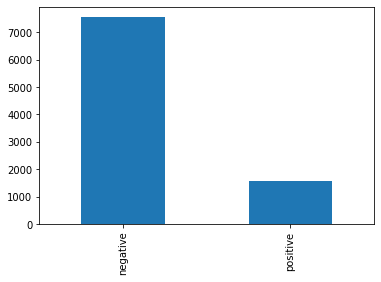

In [11]:
print("Let's see how many Tweets we have for each sentiment tag")

column_name = 'airline_sentiment'

df[column_name].value_counts().plot.bar()


# Final Dataset

In [12]:
df

tweet_id airline_sentiment  airline_sentiment_confidence  \
3      570301031407624196          negative                           1.0   
4      570300817074462722          negative                           1.0   
5      570300767074181121          negative                           1.0   
9      570295459631263746          positive                           1.0   
11     570289724453216256          positive                           1.0   
...                   ...               ...                           ...   
14630  569588473050611712          positive                           1.0   
14631  569588464896876545          negative                           1.0   
14633  569587705937600512          negative                           1.0   
14636  569587371693355008          negative                           1.0   
14638  569587188687634433          negative                           1.0   

              airline                                               text  
3      Virgin America  @VirginAmerica it's really aggressive to blast...  
4      Virgin America  @VirginAmerica and it's a really big bad thing...  
5      Virgin America  @VirginAmerica seriously would pay $30 a fligh...  
9      Virgin America  @VirginAmerica it was amazing, and arrived an ...  
11     Virgin America  @VirginAmerica I &lt;3 pretty graphics. so muc...  
...               ...                                                ...  
14630        American                        @AmericanAir Thanks! He is.  
14631        American  @AmericanAir thx for nothing on getting us out...  
14633        American  @AmericanAir my flight was Cancelled Flightled...  
14636        American  @AmericanAir leaving over 20 minutes Late Flig...  
14638        American  @AmericanAir you have my money, you change my ...  

[9134 rows x 5 columns]

In [13]:
# Let's look at the Tweets


In [14]:
n_tweets = len(df['text'])
print("There is a total of " + str(n_tweets) + " Tweets.")

There is a total of 9134 Tweets.


In [15]:
for i,k in enumerate(df['text'][0:10]): print("Tweet " + str(i+1) + ":",  k, "(" + str(df['airline_sentiment'].to_list()[i]) + ")\n")

Tweet 1: @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse (negative)

Tweet 2: @VirginAmerica and it's a really big bad thing about it (negative)

Tweet 3: @VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.
it's really the only bad thing about flying VA (negative)

Tweet 4: @VirginAmerica it was amazing, and arrived an hour early. You're too good to me. (positive)

Tweet 5: @VirginAmerica I &lt;3 pretty graphics. so much better than minimal iconography. :D (positive)

Tweet 6: @VirginAmerica This is such a great deal! Already thinking about my 2nd trip to @Australia &amp; I haven't even gone on my 1st trip yet! ;p (positive)

Tweet 7: @VirginAmerica Thanks! (positive)

Tweet 8: @VirginAmerica So excited for my first cross country flight LAX to MCO I've heard nothing but great things about Virgin America. #29DaysToGo (positive)

Tweet 9: @VirginAmerica  I flew from NYC to 

# Let's start the cleaning!

# Basic cleaning

In [16]:
import re
import string
import emoji

tweets = df['text'].to_list()

def basic_cleaning(tweet):

    #This makes text lowercase
    tweet = tweet.lower()
    #This removes hashtag
    tweet = tweet.replace("#","")
    #This removes any sequence of characters that starts with "@" i.e. usernames
    tweet = re.sub('@[^\s]+','',tweet)
    #Remove any HTML special symbols such as &amp;
    tweet = re.sub('(?:\s)&[^, ]*', '', tweet)

    #We remove digits
    tweet = ''.join([i for i in tweet if not i.isdigit()])
    
    #we use the emoji library for dealing with complex emojis
    tweet = emoji.demojize(tweet)


    #And now we can finally remove punctuation
    for c in string.punctuation:
        tweet = tweet.replace(c,"")


    return tweet


In [17]:
#You apply the basic_cleaning function to all the tweets
tweets = [basic_cleaning(tweet) for tweet in tweets]

#And display the results
for i,k in enumerate(tweets[0:10]): print("Tweet " + str(i+1) + ":",  k, "(" + str(df['airline_sentiment'].to_list()[i]) + ")\n")



Tweet 1:  it's really aggressive to blast obnoxious "entertainment" in your guests' faces they have little recourse (negative)

Tweet 2:  and it's a really big bad thing about it (negative)

Tweet 3:  seriously would pay $ a flight for seats that didn't have this playing.
it's really the only bad thing about flying va (negative)

Tweet 4:  it was amazing, and arrived an hour early. you're too good to me. (positive)

Tweet 5:  i pretty graphics. so much better than minimal iconography. :d (positive)

Tweet 6:  this is such a great deal! already thinking about my nd trip to  i haven't even gone on my st trip yet! ;p (positive)

Tweet 7:  thanks! (positive)

Tweet 8:  so excited for my first cross country flight lax to mco i've heard nothing but great things about virgin america. daystogo (positive)

Tweet 9:   i flew from nyc to sfo last week and couldn't fully sit in my seat due to two large gentleman on either side of me. help! (negative)

Tweet 10: i ‚ù§Ô∏è flying  üëç ‚ò∫Ô∏è (positi

# Splitting a String of Text into Words


In [20]:
def tokenise_tweets(tweet):

    tweet = tweet.split()

    return tweet

In [21]:
#Apply tokeniserr to all tweets
tweets = [tokenise_tweets(tweet) for tweet in tweets]

for i,k in enumerate(tweets[0:10]): print(i+1,  k, "(" + str(df['airline_sentiment'].to_list()[i]) + ")\n")

1 ['its', 'really', 'aggressive', 'to', 'blast', 'obnoxious', 'entertainment', 'in', 'your', 'guests', 'faces', 'they', 'have', 'little', 'recourse'] (negative)

2 ['and', 'its', 'a', 'really', 'big', 'bad', 'thing', 'about', 'it'] (negative)

3 ['seriously', 'would', 'pay', 'a', 'flight', 'for', 'seats', 'that', 'didnt', 'have', 'this', 'playing', 'its', 'really', 'the', 'only', 'bad', 'thing', 'about', 'flying', 'va'] (negative)

4 ['it', 'was', 'amazing', 'and', 'arrived', 'an', 'hour', 'early', 'youre', 'too', 'good', 'to', 'me'] (positive)

5 ['i', 'pretty', 'graphics', 'so', 'much', 'better', 'than', 'minimal', 'iconography', 'happyface'] (positive)

6 ['this', 'is', 'such', 'a', 'great', 'deal', 'already', 'thinking', 'about', 'my', 'nd', 'trip', 'to', 'i', 'havent', 'even', 'gone', 'on', 'my', 'st', 'trip', 'yet', 'happyface'] (positive)

7 ['thanks'] (positive)

8 ['so', 'excited', 'for', 'my', 'first', 'cross', 'country', 'flight', 'lax', 'to', 'mco', 'ive', 'heard', 'nothing

In [22]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
from nltk.corpus import stopwords

def advance_cleaning(tweet):

    #Remove stopwords in list stopwords.words('english')
    tweet = [word for word in tweet if not word in stopwords.words('english')]


    #Lemmatizing verbs
    tweet = [wnl.lemmatize(word, pos='v') for word in tweet]
    #Lemmatizing nouns
    tweet = [wnl.lemmatize(word, pos='n') for word in tweet]
    #Lemmatizing adjectives
    tweet = [wnl.lemmatize(word, pos='a') for word in tweet]
    tweet = [wnl.lemmatize(word, pos='s') for word in tweet]
    #Lemmatizing adverbs
    tweet = [wnl.lemmatize(word, pos='r') for word in tweet]



    return tweet

In [23]:
#Apply advance cleaning to all tweets
tweets = [advance_cleaning(tweet) for tweet in tweets]

for i,k in enumerate(tweets[0:10]): print(i+1,  k, "(" + str(df['airline_sentiment'].to_list()[i]) + ")\n")

1 ['really', 'aggressive', 'blast', 'obnoxious', 'entertainment', 'guest', 'face', 'little', 'recourse'] (negative)

2 ['really', 'big', 'bad', 'thing'] (negative)

3 ['seriously', 'would', 'pay', 'flight', 'seat', 'didnt', 'play', 'really', 'bad', 'thing', 'fly', 'va'] (negative)

4 ['amaze', 'arrive', 'hour', 'early', 'youre', 'good'] (positive)

5 ['pretty', 'graphic', 'much', 'good', 'minimal', 'iconography', 'happyface'] (positive)

6 ['great', 'deal', 'already', 'think', 'nd', 'trip', 'havent', 'even', 'go', 'st', 'trip', 'yet', 'happyface'] (positive)

7 ['thank'] (positive)

8 ['excite', 'first', 'cross', 'country', 'flight', 'lax', 'mco', 'ive', 'hear', 'nothing', 'great', 'thing', 'virgin', 'america', 'daystogo'] (positive)

9 ['fly', 'nyc', 'sfo', 'last', 'week', 'couldnt', 'fully', 'sit', 'seat', 'due', 'two', 'large', 'gentleman', 'either', 'side', 'help'] (negative)

10 ['redheartselector', 'fly', 'thumbsup', 'smilingfaceselector'] (positive)



In [24]:
#We put the preprocessed tweets back to the dataset as a new column
df['preprocessed_tweets'] = tweets

#Our dataset now looks like this
print("Our dataset now has a new column called preprocessed_tweets")
df.head(3)


Our dataset now has a new column called preprocessed_tweets


tweet_id airline_sentiment  airline_sentiment_confidence  \
3  570301031407624196          negative                           1.0   
4  570300817074462722          negative                           1.0   
5  570300767074181121          negative                           1.0   

          airline                                               text  \
3  Virgin America  @VirginAmerica it's really aggressive to blast...   
4  Virgin America  @VirginAmerica and it's a really big bad thing...   
5  Virgin America  @VirginAmerica seriously would pay $30 a fligh...   

                                 preprocessed_tweets  
3  [really, aggressive, blast, obnoxious, enterta...  
4                          [really, big, bad, thing]  
5  [seriously, would, pay, flight, seat, didnt, p...

# Some visual exploration

In [25]:
import itertools

all_tweets = list(itertools.chain.from_iterable(df['preprocessed_tweets'].to_list()))


positive_df = df[df['airline_sentiment'] == 'positive']
negative_df = df[df['airline_sentiment'] == 'negative']

positive_tweets = list(itertools.chain.from_iterable(positive_df['preprocessed_tweets'].to_list()))
negative_tweets = list(itertools.chain.from_iterable(negative_df['preprocessed_tweets'].to_list()))


### Exploring the length

Average length of tweets 9.674074885044888 words


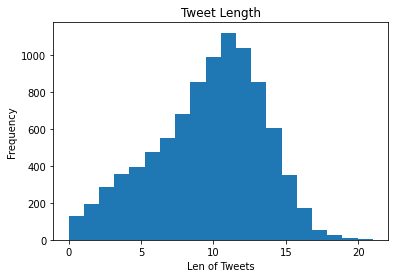

In [26]:
list_of_lens = [len(a_list) for a_list in df['preprocessed_tweets'].to_list()]

average = sum(list_of_lens) / len(list_of_lens)

print("Average length of tweets" , average, "words")

fig = plt.figure()
plt.hist(list_of_lens, density=False, bins=20)
plt.ylabel('Frequency')
plt.xlabel("Len of Tweets")
plt.title("Tweet Length")
fig.savefig("len_plots/tweet_lens.png")

### Vocab of positive tweets

Exploring positive tweets
Total number of words  11781
Number of unique vocabulary items  2767
10 most common vocabulary items  [('thank', 779), ('flight', 309), ('great', 200), ('get', 148), ('service', 138), ('love', 116), ('fly', 113), ('make', 111), ('good', 103), ('customer', 102)]


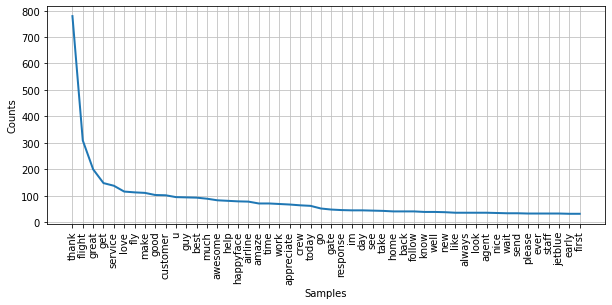

In [27]:
from nltk import FreqDist
import matplotlib.pyplot as plt

print("Exploring positive tweets")

fdist = FreqDist(positive_tweets)

print("Total number of words ", len(positive_tweets))
print("Number of unique vocabulary items ", len(set(positive_tweets)))
print("10 most common vocabulary items ", fdist.most_common(10))

fig = plt.figure(figsize=(10, 4))
fdist.plot(50, cumulative=False)
fig.suptitle('positive', fontsize=16)
fig.savefig('freq_dist_plots/freqDistpositive.png', bbox_inches="tight")

### Vocab of negative Tweets

Exploring negative tweets
Total number of words  76582
Number of unique vocabulary items  7261
10 most common vocabulary items  [('flight', 3034), ('get', 1253), ('hour', 1023), ('delay', 811), ('cancel', 806), ('service', 709), ('customer', 708), ('time', 649), ('hold', 625), ('u', 624)]


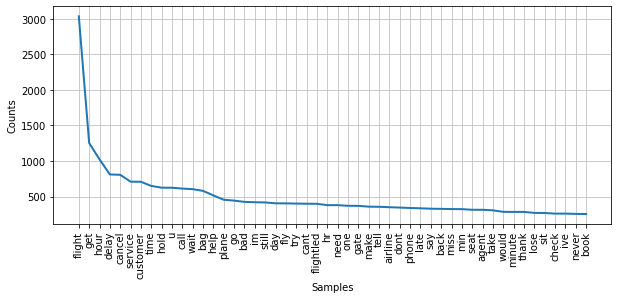

In [28]:
print("Exploring negative tweets")

fdist = FreqDist(negative_tweets)

print("Total number of words ", len(negative_tweets))
print("Number of unique vocabulary items ", len(set(negative_tweets)))
print("10 most common vocabulary items ", fdist.most_common(10))

fig = plt.figure(figsize=(10, 4))
fdist.plot(50, cumulative=False)
fig.suptitle('positive', fontsize=16)
fig.savefig('freq_dist_plots/freqDistpositive.png', bbox_inches="tight")

### POS Tags

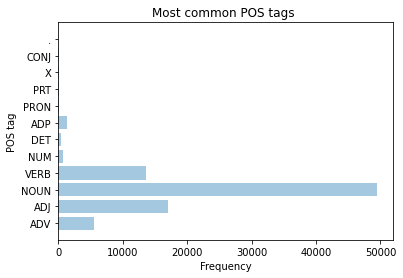

In [29]:
from nltk.tag import map_tag
from collections import Counter

tags = nltk.pos_tag(all_tweets)

simplifiedTags = [(word, map_tag('en-ptb', 'universal', tag)) for word, tag in tags]

counts = Counter(tag for word, tag in simplifiedTags)

# Counter data, counter is your counter object
keys = counts.keys()
y_pos = np.arange(len(keys))
# get the counts for each key, assuming the values are numerical
frequency = [counts[k] for k in keys]


plt.barh(y_pos, frequency, align='center', alpha=0.4)
plt.yticks(y_pos, keys)
plt.xlabel('Frequency')
plt.ylabel('POS tag')
plt.title('Most common POS tags ')

plt.show()


# Text Embeddings


# 1. Bag of Words

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

def dummy_fun(doc):
    return doc

def bow_vectorizer(df):


    model = CountVectorizer(
        tokenizer=dummy_fun,
        preprocessor=dummy_fun,
        token_pattern=None, min_df=1)

    print("Constructing BOW vectors")

    docs = df['preprocessed_tweets'].to_list()

    print("Number of tweets", len(docs))

    model.fit(docs)
    vocab = model.vocabulary_
    print("Number of unique vocabulary items is ", len(vocab))
    sorted_vocab_list = [k for k, v in sorted(vocab.items())]

    print("Constructing vectors...")

    vector_matrices = [model.transform([doc]) for doc in docs]
    vector_arrays = [matrix.toarray() for matrix in vector_matrices]
    vectors = [pd.Series(x.flatten()) for x in vector_arrays]

    final_df = pd.DataFrame(vectors)
    final_df.columns = sorted_vocab_list

    final_df['airline_sentiment'] = df['airline_sentiment'].to_list()

    return final_df

### Let's try out the model for only one Tweet

In [31]:
one_tweet = df[3:4]
bow_example_1 = bow_vectorizer(one_tweet)
print("Final result:")
bow_example_1

Constructing BOW vectors
Number of tweets 1
Number of unique vocabulary items is  6
Constructing vectors...
Final result:


amaze  arrive  early  good  hour  youre airline_sentiment
0      1       1      1     1     1      1          positive

### Let's try out the model for two Tweets

In [32]:
two_tweets = df[2:4]
bow_example_2 = bow_vectorizer(two_tweets)
print("Final result:")
bow_example_2

Constructing BOW vectors
Number of tweets 2
Number of unique vocabulary items is  18
Constructing vectors...
Final result:


amaze  arrive  bad  didnt  early  flight  fly  good  hour  pay  play  \
0      0       0    1      1      0       1    1     0     0    1     1   
1      1       1    0      0      1       0    0     1     1    0     0   

   really  seat  seriously  thing  va  would  youre airline_sentiment  
0       1     1          1      1   1      1      0          negative  
1       0     0          0      0   0      0      1          positive

### Let's try out the model for ten Tweets

In [33]:
ten_tweets = df[0:10]
bow_example_3 = bow_vectorizer(ten_tweets)
print("Final result:")
bow_example_3

Constructing BOW vectors
Number of tweets 10
Number of unique vocabulary items is  74
Constructing vectors...
Final result:


aggressive  already  amaze  america  arrive  bad  big  blast  couldnt  \
0           1        0      0        0       0    0    0      1        0   
1           0        0      0        0       0    1    1      0        0   
2           0        0      0        0       0    1    0      0        0   
3           0        0      1        0       1    0    0      0        0   
4           0        0      0        0       0    0    0      0        0   
5           0        1      0        0       0    0    0      0        0   
6           0        0      0        0       0    0    0      0        0   
7           0        0      0        1       0    0    0      0        0   
8           0        0      0        0       0    0    0      0        1   
9           0        0      0        0       0    0    0      0        0   

   country  ...  thumbsup  trip  two  va  virgin  week  would  yet  youre  \
0        0  ...         0     0    0   0       0     0      0    0      0   
1        0  ...         0     0    0   0       0     0      0    0      0   
2        0  ...         0     0    0   1       0     0      1    0      0   
3        0  ...         0     0    0   0       0     0      0    0      1   
4        0  ...         0     0    0   0       0     0      0    0      0   
5        0  ...         0     2    0   0       0     0      0    1      0   
6        0  ...         0     0    0   0       0     0      0    0      0   
7        1  ...         0     0    0   0       1     0      0    0      0   
8        0  ...         0     0    1   0       0     1      0    0      0   
9        0  ...         1     0    0   0       0     0      0    0      0   

   airline_sentiment  
0           negative  
1           negative  
2           negative  
3           positive  
4           positive  
5           positive  
6           positive  
7           positive  
8           negative  
9           positive  

[10 rows x 75 columns]

### Finally let's try it for the whole dataset!

In [34]:
bow_vectors = bow_vectorizer(df)
bow_vectors

Constructing BOW vectors
Number of tweets 9134
Number of unique vocabulary items is  8422
Constructing vectors...


NGbutton  OKhand  OKhandOKhandOKhand  aa  aaaand  aaadvantage  aacom  \
0            0       0                   0   0       0            0      0   
1            0       0                   0   0       0            0      0   
2            0       0                   0   0       0            0      0   
3            0       0                   0   0       0            0      0   
4            0       0                   0   0       0            0      0   
...        ...     ...                 ...  ..     ...          ...    ...   
9129         0       0                   0   0       0            0      0   
9130         0       0                   0   0       0            0      0   
9131         0       0                   0   0       0            0      0   
9132         0       0                   0   0       0            0      0   
9133         0       0                   0   0       0            0      0   

      aadelay  aadfw  aadv  ...  ‚Äô  ‚Äú  ‚Äúgay  ‚Äúinconvenient‚Äù  ‚Äúthank  ‚Äúwe  ‚Äù  \
0           0      0     0  ...  0  0     0               0       0    0  0   
1           0      0     0  ...  0  0     0               0       0    0  0   
2           0      0     0  ...  0  0     0               0       0    0  0   
3           0      0     0  ...  0  0     0               0       0    0  0   
4           0      0     0  ...  0  0     0               0       0    0  0   
...       ...    ...   ...  ... .. ..   ...             ...     ...  ... ..   
9129        0      0     0  ...  0  0     0               0       0    0  0   
9130        0      0     0  ...  0  0     0               0       0    0  0   
9131        0      0     0  ...  0  0     0               0       0    0  0   
9132        0      0     0  ...  0  0     0               0       0    0  0   
9133        0      0     0  ...  0  0     0               0       0    0  0   

      ‚Ä¶  ‚Ç¨  airline_sentiment  
0     0  0           negative  
1     0  0           negative  
2     0  0           negative  
3     0  0           positive  
4     0  0           positive  
...  .. ..                ...  
9129  0  0           positive  
9130  0  0           negative  
9131  0  0           negative  
9132  0  0           negative  
9133  0  0           negative  

[9134 rows x 8423 columns]

# 2. TF-IDF

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tf_idf_vectorizer(df):

    print("Initialising TF-IDF model")

    model = TfidfVectorizer(
        analyzer='word',
        tokenizer=dummy_fun,
        preprocessor=dummy_fun,
        token_pattern=None, min_df=1)

    print("Constructing TF-IDF vectors")

    docs = df['preprocessed_tweets'].to_list()

    print("Number of tweets", len(docs))

    model.fit(docs)
    vocab = model.vocabulary_
    print("Number of unique vocabulary items is ", len(vocab))
    sorted_vocab_list = [k for k, v in sorted(vocab.items())]

    print("Constructing vectors...")

    vector_matrices = [model.transform([doc]) for doc in docs]
    vector_arrays = [matrix.toarray() for matrix in vector_matrices]
    vectors = [pd.Series(x.flatten()) for x in vector_arrays]

    final_df = pd.DataFrame(vectors)
    final_df.columns = sorted_vocab_list

    final_df['airline_sentiment'] = df['airline_sentiment'].to_list()

    return final_df

### Let's try out the model for ten Tweets

In [36]:
two_tweets = df[0:10]
tfidf_example = tf_idf_vectorizer(two_tweets)
print("Final result:")
tfidf_example

Initialising TF-IDF model
Constructing TF-IDF vectors
Number of tweets 10
Number of unique vocabulary items is  74
Constructing vectors...
Final result:


aggressive  already     amaze   america    arrive       bad       big  \
0     0.34193  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
1     0.00000  0.00000  0.000000  0.000000  0.000000  0.505423  0.594552   
2     0.00000  0.00000  0.000000  0.000000  0.000000  0.271173  0.000000   
3     0.00000  0.00000  0.418024  0.000000  0.418024  0.000000  0.000000   
4     0.00000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
5     0.00000  0.26311  0.000000  0.000000  0.000000  0.000000  0.000000   
6     0.00000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
7     0.00000  0.00000  0.000000  0.267276  0.000000  0.000000  0.000000   
8     0.00000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
9     0.00000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   

     blast   couldnt   country  ...  thumbsup      trip       two        va  \
0  0.34193  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
1  0.00000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
2  0.00000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.318993   
3  0.00000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
4  0.00000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
5  0.00000  0.000000  0.000000  ...  0.000000  0.526219  0.000000  0.000000   
6  0.00000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
7  0.00000  0.000000  0.267276  ...  0.000000  0.000000  0.000000  0.000000   
8  0.00000  0.255858  0.000000  ...  0.000000  0.000000  0.255858  0.000000   
9  0.00000  0.000000  0.000000  ...  0.530511  0.000000  0.000000  0.000000   

     virgin      week     would      yet     youre  airline_sentiment  
0  0.000000  0.000000  0.000000  0.00000  0.000000           negative  
1  0.000000  0.000000  0.000000  0.00000  0.000000           negative  
2  0.000000  0.000000  0.318993  0.00000  0.000000           negative  
3  0.000000  0.000000  0.000000  0.00000  0.418024           positive  
4  0.000000  0.000000  0.000000  0.00000  0.000000           positive  
5  0.000000  0.000000  0.000000  0.26311  0.000000           positive  
6  0.000000  0.000000  0.000000  0.00000  0.000000           positive  
7  0.267276  0.000000  0.000000  0.00000  0.000000           positive  
8  0.000000  0.255858  0.000000  0.00000  0.000000           negative  
9  0.000000  0.000000  0.000000  0.00000  0.000000           positive  

[10 rows x 75 columns]

### Let's apply it to the whole dataset!

In [37]:
tfidf_vectors = tf_idf_vectorizer(df)
tfidf_vectors

Initialising TF-IDF model
Constructing TF-IDF vectors
Number of tweets 9134
Number of unique vocabulary items is  8422
Constructing vectors...


NGbutton  OKhand  OKhandOKhandOKhand   aa  aaaand  aaadvantage  aacom  \
0          0.0     0.0                 0.0  0.0     0.0          0.0    0.0   
1          0.0     0.0                 0.0  0.0     0.0          0.0    0.0   
2          0.0     0.0                 0.0  0.0     0.0          0.0    0.0   
3          0.0     0.0                 0.0  0.0     0.0          0.0    0.0   
4          0.0     0.0                 0.0  0.0     0.0          0.0    0.0   
...        ...     ...                 ...  ...     ...          ...    ...   
9129       0.0     0.0                 0.0  0.0     0.0          0.0    0.0   
9130       0.0     0.0                 0.0  0.0     0.0          0.0    0.0   
9131       0.0     0.0                 0.0  0.0     0.0          0.0    0.0   
9132       0.0     0.0                 0.0  0.0     0.0          0.0    0.0   
9133       0.0     0.0                 0.0  0.0     0.0          0.0    0.0   

      aadelay  aadfw  aadv  ...    ‚Äô    ‚Äú  ‚Äúgay  ‚Äúinconvenient‚Äù  ‚Äúthank  ‚Äúwe  \
0         0.0    0.0   0.0  ...  0.0  0.0   0.0             0.0     0.0  0.0   
1         0.0    0.0   0.0  ...  0.0  0.0   0.0             0.0     0.0  0.0   
2         0.0    0.0   0.0  ...  0.0  0.0   0.0             0.0     0.0  0.0   
3         0.0    0.0   0.0  ...  0.0  0.0   0.0             0.0     0.0  0.0   
4         0.0    0.0   0.0  ...  0.0  0.0   0.0             0.0     0.0  0.0   
...       ...    ...   ...  ...  ...  ...   ...             ...     ...  ...   
9129      0.0    0.0   0.0  ...  0.0  0.0   0.0             0.0     0.0  0.0   
9130      0.0    0.0   0.0  ...  0.0  0.0   0.0             0.0     0.0  0.0   
9131      0.0    0.0   0.0  ...  0.0  0.0   0.0             0.0     0.0  0.0   
9132      0.0    0.0   0.0  ...  0.0  0.0   0.0             0.0     0.0  0.0   
9133      0.0    0.0   0.0  ...  0.0  0.0   0.0             0.0     0.0  0.0   

        ‚Äù    ‚Ä¶    ‚Ç¨  airline_sentiment  
0     0.0  0.0  0.0           negative  
1     0.0  0.0  0.0           negative  
2     0.0  0.0  0.0           negative  
3     0.0  0.0  0.0           positive  
4     0.0  0.0  0.0           positive  
...   ...  ...  ...                ...  
9129  0.0  0.0  0.0           positive  
9130  0.0  0.0  0.0           negative  
9131  0.0  0.0  0.0           negative  
9132  0.0  0.0  0.0           negative  
9133  0.0  0.0  0.0           negative  

[9134 rows x 8423 columns]

# 3. Word2Vec

In [38]:
from gensim.models import Word2Vec
import pandas as pd

def word2vec_training(df):

    docs = df['preprocessed_tweets'].to_list()

    print("Training...")

    model = Word2Vec(sentences=docs, window=5, size=300, min_count=1, workers=4)

    print("Saving model...")

    model.save("word2vec_models/word2vec.model")

    return model


In [39]:
print("Training model")
word2vec_model = word2vec_training(df)

Training model
Training...
Saving model...


In [40]:
word_to_evaluate = 'good'
print("Most similar words to " + word_to_evaluate, word2vec_model.wv.most_similar([word_to_evaluate]))

Most similar words to good [('see', 0.9999814033508301), ('love', 0.9999769926071167), ('staff', 0.999975323677063), ('really', 0.9999752640724182), ('company', 0.9999738335609436), ('employee', 0.9999728202819824), ('team', 0.9999724626541138), ('awesome', 0.9999723434448242), ('amaze', 0.9999711513519287), ('guy', 0.9999709725379944)]


In [43]:
def w2vec_get_vectors(corpus, model):
    list_of_lists = []

    for tweet in corpus:
        vector_list = []

        if not tweet:
            vector = np.zeros(300)
            vector_list.append(vector)
        else:
            for word in tweet:
                try:
                    vector = model.wv[word]
                    vector_list.append(vector)
                except KeyError:
                    print("Word not found ", word)
                    
        list_of_lists.append(vector_list)

    list_of_series = [pd.Series(list) for list in list_of_lists]
    list_of_vector_averages = [np.mean(i, axis=0) for i in list_of_series]

    return list_of_vector_averages


def word2vec_vectorizer(df, model):
    docs = df['preprocessed_tweets'].to_list()
    print("Number of tweets", len(docs))
    
    print("Generating vectors... ")
    vectorised_statements = w2vec_get_vectors(docs, model)

    word2vec = pd.DataFrame(vectorised_statements)

    word2vec['airline_sentiment'] = df['airline_sentiment'].to_list()

    return word2vec

### Let's try out the model for ten Tweets

In [44]:
ten_tweets = df[0:10]
word2vec_example = word2vec_vectorizer(ten_tweets, word2vec_model)
print("Final result:")
word2vec_example

Number of tweets 10
Generating vectors... 
Final result:


0         1         2         3         4         5         6  \
0  0.044532 -0.055483  0.149647 -0.040557 -0.024827  0.135583  0.125194   
1  0.137797 -0.174890  0.463389 -0.128007 -0.074842  0.426420  0.396291   
2  0.141163 -0.172749  0.465008 -0.125913 -0.079330  0.420001  0.387939   
3  0.142938 -0.173846  0.473732 -0.128120 -0.080837  0.426724  0.388625   
4  0.073045 -0.091290  0.248085 -0.068019 -0.039983  0.226706  0.209177   
5  0.129392 -0.158685  0.429714 -0.117059 -0.071996  0.389877  0.358540   
6  0.177215 -0.218260  0.590677 -0.164578 -0.091513  0.541668  0.496185   
7  0.093172 -0.112241  0.304744 -0.081617 -0.053623  0.274118  0.251974   
8  0.109065 -0.132793  0.361186 -0.098415 -0.062010  0.324854  0.297219   
9  0.056250 -0.072004  0.190874 -0.052436 -0.029964  0.174678  0.162210   

          7         8         9  ...       291       292       293       294  \
0 -0.078199  0.063162 -0.020029  ...  0.017964  0.065422 -0.085898  0.097679   
1 -0.245385  0.200657 -0.060431  ...  0.061799  0.205865 -0.271738  0.306579   
2 -0.241407  0.197952 -0.062596  ...  0.060232  0.204677 -0.268770  0.305676   
3 -0.240529  0.198230 -0.066260  ...  0.057208  0.205320 -0.270564  0.307882   
4 -0.129411  0.105529 -0.031898  ...  0.029702  0.109088 -0.142456  0.163353   
5 -0.222427  0.182048 -0.057469  ...  0.052003  0.187478 -0.246470  0.281466   
6 -0.307836  0.251958 -0.078142  ...  0.069754  0.255967 -0.338505  0.385958   
7 -0.157383  0.128917 -0.042658  ...  0.039939  0.133709 -0.176059  0.199401   
8 -0.186095  0.152131 -0.049275  ...  0.044741  0.157098 -0.205612  0.235279   
9 -0.101208  0.082633 -0.023165  ...  0.025724  0.083626 -0.111053  0.125477   

        295       296       297       298       299  airline_sentiment  
0  0.046382 -0.103207 -0.040971  0.053776 -0.084768           negative  
1  0.146362 -0.322625 -0.130324  0.167506 -0.262475           negative  
2  0.145370 -0.320436 -0.130687  0.169051 -0.263119           negative  
3  0.144800 -0.324873 -0.129279  0.169489 -0.267302           positive  
4  0.076953 -0.172665 -0.068540  0.088791 -0.140022           positive  
5  0.132622 -0.297596 -0.119758  0.154151 -0.243535           positive  
6  0.178761 -0.412566 -0.161468  0.208197 -0.328328           positive  
7  0.094863 -0.210113 -0.085661  0.111141 -0.172555           positive  
8  0.110724 -0.248024 -0.100536  0.129831 -0.204374           negative  
9  0.059855 -0.133028 -0.053561  0.068568 -0.107856           positive  

[10 rows x 301 columns]

### Let's apply it to the whole dataset

In [46]:
word2vec_vectors = word2vec_vectorizer(df,word2vec_model)
word2vec_vectors

Number of tweets 9134
Generating vectors... 


0         1         2         3         4         5         6  \
0     0.044532 -0.055483  0.149647 -0.040557 -0.024827  0.135583  0.125194   
1     0.137797 -0.174890  0.463389 -0.128007 -0.074842  0.426420  0.396291   
2     0.141163 -0.172749  0.465008 -0.125913 -0.079330  0.420001  0.387939   
3     0.142938 -0.173846  0.473732 -0.128120 -0.080837  0.426724  0.388625   
4     0.073045 -0.091290  0.248085 -0.068019 -0.039983  0.226706  0.209177   
...        ...       ...       ...       ...       ...       ...       ...   
9129  0.177215 -0.218260  0.590677 -0.164578 -0.091513  0.541668  0.496185   
9130  0.150012 -0.181574  0.495379 -0.135340 -0.086078  0.445351  0.407099   
9131  0.138370 -0.152563  0.419643 -0.105819 -0.085515  0.363766  0.331328   
9132  0.136460 -0.159853  0.437035 -0.114930 -0.081555  0.385817  0.351137   
9133  0.129280 -0.155428  0.420858 -0.113162 -0.074752  0.375967  0.346555   

             7         8         9  ...       291       292       293  \
0    -0.078199  0.063162 -0.020029  ...  0.017964  0.065422 -0.085898   
1    -0.245385  0.200657 -0.060431  ...  0.061799  0.205865 -0.271738   
2    -0.241407  0.197952 -0.062596  ...  0.060232  0.204677 -0.268770   
3    -0.240529  0.198230 -0.066260  ...  0.057208  0.205320 -0.270564   
4    -0.129411  0.105529 -0.031898  ...  0.029702  0.109088 -0.142456   
...        ...       ...       ...  ...       ...       ...       ...   
9129 -0.307836  0.251958 -0.078142  ...  0.069754  0.255967 -0.338505   
9130 -0.252848  0.207200 -0.069719  ...  0.059635  0.215729 -0.281472   
9131 -0.212588  0.172874 -0.065323  ...  0.058988  0.185015 -0.241758   
9132 -0.222652  0.181802 -0.067317  ...  0.057422  0.189459 -0.249504   
9133 -0.217372  0.177743 -0.061076  ...  0.053729  0.184770 -0.241279   

           294       295       296       297       298       299  \
0     0.097679  0.046382 -0.103207 -0.040971  0.053776 -0.084768   
1     0.306579  0.146362 -0.322625 -0.130324  0.167506 -0.262475   
2     0.305676  0.145370 -0.320436 -0.130687  0.169051 -0.263119   
3     0.307882  0.144800 -0.324873 -0.129279  0.169489 -0.267302   
4     0.163353  0.076953 -0.172665 -0.068540  0.088791 -0.140022   
...        ...       ...       ...       ...       ...       ...   
9129  0.385958  0.178761 -0.412566 -0.161468  0.208197 -0.328328   
9130  0.321893  0.151126 -0.338333 -0.137249  0.178690 -0.281240   
9131  0.269755  0.127190 -0.282471 -0.120162  0.156446 -0.237548   
9132  0.282845  0.133047 -0.294798 -0.120108  0.157019 -0.248797   
9133  0.274450  0.131089 -0.288404 -0.117524  0.153426 -0.238964   

      airline_sentiment  
0              negative  
1              negative  
2              negative  
3              positive  
4              positive  
...                 ...  
9129           positive  
9130           negative  
9131           negative  
9132           negative  
9133           negative  

[9134 rows x 301 columns]

# Classifier - Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

le = preprocessing.LabelEncoder()



In [48]:
def class_encoding(df):

    multi_class_values = df['airline_sentiment'].tolist()

    le.fit(multi_class_values)
    encoded_classes = le.transform(multi_class_values)

    unique_classes = le.classes_

    for x in unique_classes:
        print(str(x) + " is encoded to " + str(le.transform([x])))

    df_encoded = df.drop('airline_sentiment', axis=1)

    df_encoded['labels'] = encoded_classes

    return df_encoded

In [49]:
def split_train_test(data):


    training_set, test_set = train_test_split(data, test_size=0.2, random_state=1)

    print("Training shape ", training_set.shape)
    print("Test shape ", test_set.shape)

    print("Training target distributions ")
    print(training_set['labels'].value_counts())
    print("Test target labels ")
    print(test_set['labels'].value_counts())

    X_train = training_set.iloc[:, :-1].values
    Y_train = training_set.iloc[:, -1].values
    X_test = test_set.iloc[:, :-1].values
    Y_test = test_set.iloc[:, -1].values

    return X_train, Y_train, X_test, Y_test

In [50]:
def evaluation(Y_test, Y_pred):
    cm = confusion_matrix(Y_test, Y_pred)
    accuracy = float(cm.diagonal().sum()) / len(Y_test)
    print("Accuracy of on test set : ", accuracy)

    print("Confusion Matrix")
    print(cm)

    return

## Evaluating Logistic Regresion x BOW

In [51]:
#Encoding classes
bow_vectors_encoded = class_encoding(bow_vectors)
#Splitting dataset train-test
X_train, Y_train, X_test, Y_test = split_train_test(bow_vectors_encoded)
#Initialising Logistic Regression
clf = LogisticRegression(random_state=0).fit(X_train, Y_train)
#Predicting
Y_pred = clf.predict(X_test)
#Evaluating the predictions
evaluation(Y_test, Y_pred)


negative is encoded to [0]
positive is encoded to [1]
Training shape  (7307, 8423)
Test shape  (1827, 8423)
Training target distributions 
0    6025
1    1282
Name: labels, dtype: int64
Test target labels 
0    1527
1     300
Name: labels, dtype: int64
Accuracy of on test set :  0.9441707717569786
Confusion Matrix
[[1497   30]
 [  72  228]]


## Evaluating Logistic Regresion x TFIDF

In [53]:
## Evaluating Logistic Regresion x TFIDF#Encoding classes
tfidf_vectors_encoded = class_encoding(tfidf_vectors)
#Splitting dataset train-test
X_train, Y_train, X_test, Y_test = split_train_test(tfidf_vectors_encoded)
#Initialising Logistic Regression
clf = LogisticRegression(random_state=0).fit(X_train, Y_train)
#Predicting
Y_pred = clf.predict(X_test)
#Evaluating the predictions
evaluation(Y_test, Y_pred)

negative is encoded to [0]
positive is encoded to [1]
Training shape  (7307, 8423)
Test shape  (1827, 8423)
Training target distributions 
0    6025
1    1282
Name: labels, dtype: int64
Test target labels 
0    1527
1     300
Name: labels, dtype: int64
Accuracy of on test set :  0.9315818281335523
Confusion Matrix
[[1516   11]
 [ 114  186]]


## Evaluating Logistic Regresion x word2vec

In [54]:
## Evaluating Logistic Regresion x TFIDF#Encoding classes
word2vec_encoded = class_encoding(word2vec_vectors)
#Splitting dataset train-test
X_train, Y_train, X_test, Y_test = split_train_test(word2vec_encoded)
#Initialising Logistic Regression
clf = LogisticRegression(random_state=0).fit(X_train, Y_train)
#Predicting
Y_pred = clf.predict(X_test)
#Evaluating the predictions
evaluation(Y_test, Y_pred)



negative is encoded to [0]
positive is encoded to [1]
Training shape  (7307, 301)
Test shape  (1827, 301)
Training target distributions 
0    6025
1    1282
Name: labels, dtype: int64
Test target labels 
0    1527
1     300
Name: labels, dtype: int64
Accuracy of on test set :  0.8357963875205254
Confusion Matrix
[[1527    0]
 [ 300    0]]
